In [7]:
from google.colab import files
uploaded = files.upload()


Saving Sample - Superstore 2.csv to Sample - Superstore 2 (1).csv


In [9]:
df = pd.read_csv("Sample - Superstore 2.csv", encoding='ISO-8859-1')
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
import sqlite3

# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")

# Load the DataFrame into a SQL table named 'sales'
df.to_sql('sales', conn, index=False, if_exists='replace')


9994

In [11]:
import pandas as pd

# Preview a few rows using SQL
pd.read_sql("SELECT * FROM sales LIMIT 5;", conn)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [12]:
query = """
SELECT
    Category,
    [Sub-Category],
    SUM(Sales) AS Total_Sales,
    SUM(Profit) AS Total_Profit,
    ROUND(SUM(Profit) * 100.0 / NULLIF(SUM(Sales), 0), 2) AS Profit_Margin_Percent
FROM
    sales
GROUP BY
    Category, [Sub-Category]
ORDER BY
    Profit_Margin_Percent ASC;
"""

result = pd.read_sql(query, conn)
result



,Category,Sub-Category,Total_Sales,Total_Profit,Profit_Margin_Percent
0,Furniture,Tables,206965.5320,-17725.4811,-8.56
1,Furniture,Bookcases,114879.9963,-3472.5560,-3.02
2,Office Supplies,Supplies,46673.5380,-1189.0995,-2.55
3,Technology,Machines,189238.6310,3384.7569,1.79
4,Furniture,Chairs,328449.1030,26590.1663,8.10
5,Office Supplies,Storage,223843.6080,21278.8264,9.51
6,Technology,Phones,330007.0540,44515.7306,13.49
7,Furniture,Furnishings,91705.1640,13059.1436,14.24
8,Office Supplies,Binders,203412.7330,30221.7633,14.86
9,Office Supplies,Appliances,107532.1610,18138.0054,16.87


In [13]:
df['Inventory_Turnover'] = df['Quantity'] / df['Sales']


In [14]:
# Filter required columns
df_corr = df[['Profit', 'Inventory_Turnover']].dropna()

# Calculate correlation
correlation = df_corr.corr()
print("Correlation between Inventory Turnover and Profitability:\n", correlation)


Correlation between Inventory Turnover and Profitability:
                       Profit  Inventory_Turnover
Profit              1.000000           -0.070422
Inventory_Turnover -0.070422            1.000000


In [15]:
slow_moving = df[(df['Sales'] < df['Sales'].quantile(0.25)) &
                 (df['Quantity'] > df['Quantity'].quantile(0.75))]


In [16]:
slow_summary = slow_moving.groupby(['Category', 'Sub-Category']).agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum'
}).sort_values(by='Quantity', ascending=False)


In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})


In [18]:
seasonal_profit = df.groupby(['Season', 'Category'])['Profit'].sum().reset_index()


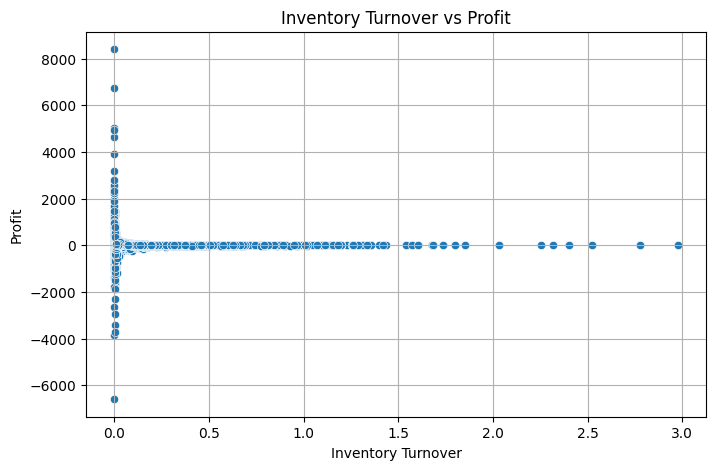

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(x='Inventory_Turnover', y='Profit', data=df)
plt.title("Inventory Turnover vs Profit")
plt.xlabel("Inventory Turnover")
plt.ylabel("Profit")
plt.grid(True)
plt.show()


In [20]:
category_corrs = df.groupby('Category')[['Profit', 'Inventory_Turnover']].corr().iloc[0::2, -1]
print(category_corrs)


Category               
Furniture        Profit   -0.025710
Office Supplies  Profit   -0.085474
Technology       Profit   -0.066439
Name: Inventory_Turnover, dtype: float64


In [22]:
import plotly.express as px
from ipywidgets import interact, widgets


In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})
